In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)


In [2]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [3]:
model = Sequential()

# Lớp đầu tiên cần chỉ định input_shape
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))

# Các lớp Conv2D tiếp theo
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Lớp fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

# Lớp output
model.add(Dense(43, activation='softmax'))

#Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [5]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
491/491 [==============================] - 42s 84ms/step - loss: 2.5359 - accuracy: 0.3904 - val_loss: 0.9998 - val_accuracy: 0.7785
Epoch 2/15
491/491 [==============================] - 38s 77ms/step - loss: 1.0753 - accuracy: 0.6888 - val_loss: 0.4091 - val_accuracy: 0.9042
Epoch 3/15
491/491 [==============================] - 38s 77ms/step - loss: 0.6629 - accuracy: 0.8069 - val_loss: 0.2000 - val_accuracy: 0.9466
Epoch 4/15
491/491 [==============================] - 42s 85ms/step - loss: 0.4107 - accuracy: 0.8809 - val_loss: 0.1584 - val_accuracy: 0.9568
Epoch 5/15
491/491 [==============================] - 37s 76ms/step - loss: 0.3259 - accuracy: 0.9069 - val_loss: 0.1059 - val_accuracy: 0.9712
Epoch 6/15
491/491 [==============================] - 38s 77ms/step - loss: 0.2650 - accuracy: 0.9252 - val_loss: 0.1244 - val_accuracy: 0.9643
Epoch 7/15
491/491 [==============================] - 37s 75ms/step - loss: 0.2265 - accuracy: 0.9352 - val_loss: 0.0657 - val_accuracy:

C:\Users\Johnny Le\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


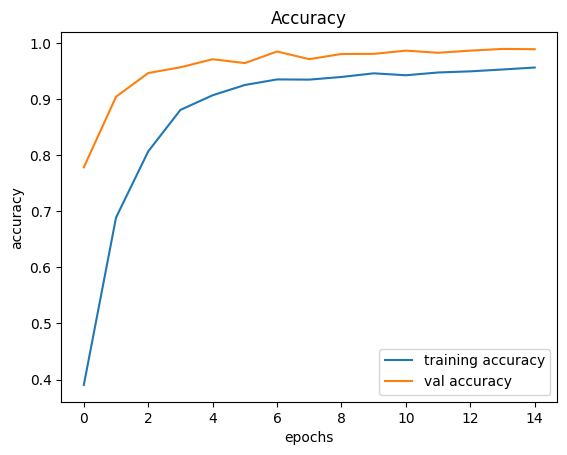

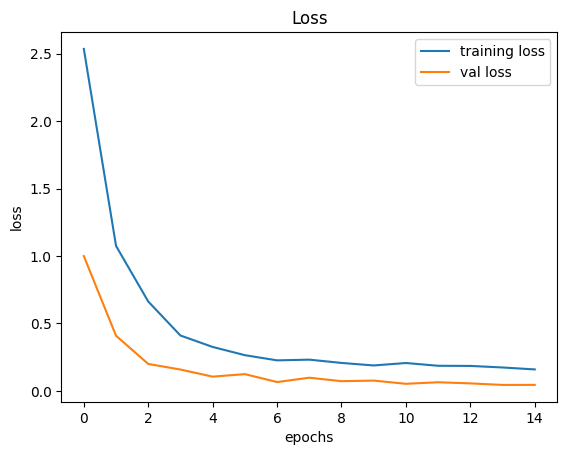

In [7]:
    #plotting graphs for accuracy 
    plt.figure(0)
    plt.plot(history.history['accuracy'], label='training accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    
    plt.figure(1)
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

In [8]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=-1)

from sklearn.metrics import accuracy_score
print(accuracy_score(labels,predicted_classes ))

395/395 [==============================] - 3s 8ms/step
0.9559778305621536


In [9]:
model.save('model2.h5')

C:\Users\Johnny Le\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
